# Top 1000 Films of All Time:

List of top 1000 movies, ranked starting with #1. Rankings are arrived at by combining ratings and percentages from five prominent movie databases: Metacritic, Rotten Tomatoes, IMDb, TCM, and Sight & Sound. Additional points are given to films repeatedly appearing on lists (created by respected critics, film directors, and various publications) of top films.

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df= pd.read_csv('movie_dataset.csv')
df

,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross
0,Bố Già,1972,175 min,"Crime, Drama",9.2,100,1987643,"134,966,411"
1,Câu Chuyện Tokyo,1953,136 min,Drama,8.1,100,67476,NaN
2,Bảy Võ Sĩ Đạo,1954,207 min,"Action, Drama",8.6,100,363320,"269,061"
3,Bố Già Phần II,1974,202 min,"Crime, Drama",9.0,100,1348889,"57,300,000"
4,Chuyện Tình Thế Chiến,1942,102 min,"Drama, Romance, War",8.5,100,600392,"1,024,560"
...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95 min,Drama,7.0,89,2188,"30,209"
996,We the Animals,2018,94 min,Drama,6.9,89,4595,"400,961"
997,David Holzman's Diary,1967,74 min,"Comedy, Drama",6.5,89,1823,NaN
998,Moonrise,1948,90 min,"Crime, Drama, Film-Noir",7.0,89,2938,NaN


### Data Cleaning and Preparation: 

In [5]:
#Checking for duplicates
df. loc[df.duplicated()]

,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross


=> No duplicated data

In [6]:
df.columns.value_counts()

MovieTitle     1
ReleaseYear    1
Duration       1
Genre          1
Rating         1
Metascore      1
Votes          1
Gross          1
dtype: int64

In [7]:
df[df.isna()].count()   #count the number of missing (NaN) values in each column 

MovieTitle     0
ReleaseYear    0
Duration       0
Genre          0
Rating         0
Metascore      0
Votes          0
Gross          0
dtype: int64

In [8]:
(df['ReleaseYear'].unique())


array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', '1989–1990', '1994', '1931', '1952',
       '1993', '1959', '1990', '1945', '1936', '1960', '1975', '1949',
       '1988', '1964', '1979', '1956', '1928', '1939', '1948', '1966',
       '1924', '1976', '1969', '1927', '1937', '1982', '2001', '1958',
       '1991', '1989', '1944', '1920', '1973', '1984', '2016', '1902',
       '2010', '2011', '1946', '1963', '1995–1998', '1961', '1925',
       '1967', 'I 2019', '1940', '1943', '1965', '1929', '1981',
       'II 2018', '2012', '1970', 'I 2015', '2018', '1987', '1971',
       '1921', '1926', '1977', '2008', '1935', '1968', '2003', '1930',
       '1934', '1951', '2013', '1922', 'I 2014', '1984 TV Movie', '2014',
       '2006', '1938', '2000', '1974 TV Movie', '1933', '1983', '2019',
       '1978', '1999', '1947', '2017', '2007 TV Movie', '1923', '2015',
       '1980', '2007', '1932', '2002', 'I 2017', '1995', 'I 2011', '1997',
       '1992

=> There are some errors:  '1989–1990', '1995–1998', 'I 2019', 'II 2018', 'I 2015', 'I 2014', '1984 TV Movie', '1974 TV Movie', '2007 TV Movie', 'I 2017', 'I 2011', 'I 2016', '1977 TV Movie', '1985– ', '2002 TV Special', 'II 2016', '1989–1999',
       '1992 TV Movie', 'III 2015', 'I 2007', '1966 TV Movie', 'II 2011', 'II 2015', 'II 2014', 'I 2008', 'II 2017',
       '2006 TV Movie', 'I 2002', '1988 TV Movie'
- Solution: 
- Convert the extracted year to datetime objects.
- Handle cases where multiple years are provided as a range (e.g., '1989–1990').
- Handle cases where the year is provided with additional text (e.g., '1984 TV Movie').   => Replace name


In [9]:
# Handle cases where the year is provided with additional text (e.g., '1984 TV Movie').
# Take only Year from string: 
def take_only_year(input_strings):
    years= []
    for input_string in input_strings:
   # Check if input_string is a string
          parts= input_string.split()
          for part in parts:
             if part.isdigit() and len(part)==4:
                 years.append(int(part))
                 break
    return years

input_strings = ['I 2019', 'II 2018', 'I 2015', 'I 2014', '1984 TV Movie', '1974 TV Movie', '2007 TV Movie', 'I 2017', 'I 2011', 'I 2016', '1977 TV Movie', '2002 TV Special', 'II 2016', '1992 TV Movie', 'III 2015', 'I 2007', '1966 TV Movie', 'II 2011', 'II 2015', 'II 2014', 'I 2008', 'II 2017',
       '2006 TV Movie', 'I 2002', '1988 TV Movie']
new_strings= take_only_year(input_strings)
new_strings

[2019,
 2018,
 2015,
 2014,
 1984,
 1974,
 2007,
 2017,
 2011,
 2016,
 1977,
 2002,
 2016,
 1992,
 2015,
 2007,
 1966,
 2011,
 2015,
 2014,
 2008,
 2017,
 2006,
 2002,
 1988]

In [10]:
# Handle cases where multiple years are provided as a range (e.g., '1989–1990'). 
# Solution: tính trung bình của năm bắt đầu và năm kết thúc trong một dãy năm.
def clean_release_years(release_years):
    cleaned_years= []
    for year_range in release_years:
            start_year, end_year = map(int, year_range.split('–'))
            average_year= start_year + ((end_year- start_year)/2)
            cleaned_years.append(int(average_year))
    return cleaned_years

release_years = ['1989–1990', '1995–1998', '1989–1999']
new_release_year = clean_release_years(release_years)
new_release_year




[1989, 1996, 1994]

In [11]:
def replace_name(a,b):
    df.ReleaseYear.replace(a,b,inplace=True)

replace_name(input_strings,new_strings)
replace_name('1985– ', '1985')
replace_name(release_years, new_release_year)


df['ReleaseYear'].unique()


array(['1972', '1953', '1954', '1974', '1942', '1941', '1962', '1957',
       '1950', '1985', '1955', 1989, '1994', '1931', '1952', '1993',
       '1959', '1990', '1945', '1936', '1960', '1975', '1949', '1988',
       '1964', '1979', '1956', '1928', '1939', '1948', '1966', '1924',
       '1976', '1969', '1927', '1937', '1982', '2001', '1958', '1991',
       '1989', '1944', '1920', '1973', '1984', '2016', '1902', '2010',
       '2011', '1946', '1963', 1996, '1961', '1925', '1967', 2019, '1940',
       '1943', '1965', '1929', '1981', 2018, '2012', '1970', 2015, '2018',
       '1987', '1971', '1921', '1926', '1977', '2008', '1935', '1968',
       '2003', '1930', '1934', '1951', '2013', '1922', 2014, 1984, '2014',
       '2006', '1938', '2000', 1974, '1933', '1983', '2019', '1978',
       '1999', '1947', '2017', 2007, '1923', '2015', '1980', '2007',
       '1932', '2002', 2017, '1995', 2011, '1997', '1992', 2016, 1977,
       '1998', '1986', '2004', '1996', 2002, '2009', 1994, 1992, 1966,


In [12]:
print(len(df['ReleaseYear'].unique()))

122


In [13]:
print(df['Duration'].dtype)

object


In [14]:
# We need to remove min, change the datatype of duration to minutes (interger)
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)
df

,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross
0,Bố Già,1972,175,"Crime, Drama",9.2,100,1987643,"134,966,411"
1,Câu Chuyện Tokyo,1953,136,Drama,8.1,100,67476,NaN
2,Bảy Võ Sĩ Đạo,1954,207,"Action, Drama",8.6,100,363320,"269,061"
3,Bố Già Phần II,1974,202,"Crime, Drama",9.0,100,1348889,"57,300,000"
4,Chuyện Tình Thế Chiến,1942,102,"Drama, Romance, War",8.5,100,600392,"1,024,560"
...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95,Drama,7.0,89,2188,"30,209"
996,We the Animals,2018,94,Drama,6.9,89,4595,"400,961"
997,David Holzman's Diary,1967,74,"Comedy, Drama",6.5,89,1823,NaN
998,Moonrise,1948,90,"Crime, Drama, Film-Noir",7.0,89,2938,NaN


Solve NaN values in Gross column:  

In [15]:
df['Gross'].isna().value_counts()

False    576
True     424
Name: Gross, dtype: int64

In [16]:
# # remove rows having NaN values
# df.dropna(subset= ['Gross'], inplace= True)

In [17]:
df[['Genre_1', 'Genre_2', 'Genre_3']] = df['Genre'].str.split(',', expand= True)
df


,MovieTitle,ReleaseYear,Duration,Genre,Rating,Metascore,Votes,Gross,Genre_1,Genre_2,Genre_3
0,Bố Già,1972,175,"Crime, Drama",9.2,100,1987643,"134,966,411",Crime,Drama,None
1,Câu Chuyện Tokyo,1953,136,Drama,8.1,100,67476,NaN,Drama,None,None
2,Bảy Võ Sĩ Đạo,1954,207,"Action, Drama",8.6,100,363320,"269,061",Action,Drama,None
3,Bố Già Phần II,1974,202,"Crime, Drama",9.0,100,1348889,"57,300,000",Crime,Drama,None
4,Chuyện Tình Thế Chiến,1942,102,"Drama, Romance, War",8.5,100,600392,"1,024,560",Drama,Romance,War
...,...,...,...,...,...,...,...,...,...,...,...
995,L'eau froide,1994,95,Drama,7.0,89,2188,"30,209",Drama,None,None
996,We the Animals,2018,94,Drama,6.9,89,4595,"400,961",Drama,None,None
997,David Holzman's Diary,1967,74,"Comedy, Drama",6.5,89,1823,NaN,Comedy,Drama,None
998,Moonrise,1948,90,"Crime, Drama, Film-Noir",7.0,89,2938,NaN,Crime,Drama,Film-Noir


In [18]:
df['Gross']= df['Gross'].replace(',','')
df['Gross'] = pd.to_numeric(df['Gross'].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')   
# Move gross to numerical data

In [19]:
df.dtypes   #check all datatypes of all columns

MovieTitle      object
ReleaseYear     object
Duration         int32
Genre           object
Rating         float64
Metascore        int64
Votes            int64
Gross          float64
Genre_1         object
Genre_2         object
Genre_3         object
dtype: object

## DATA VISUALIZATION: 

What is the distribution of release years among the top 100 films?
How does the duration of the top 100 films vary? Are there any trends over time?

Text(0.5, 1.0, 'Duration')

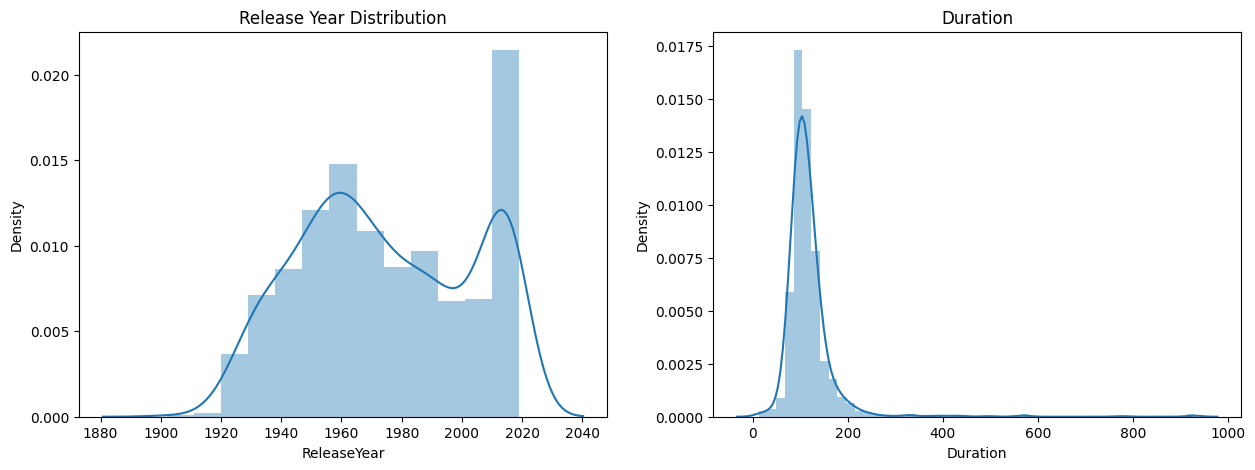

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df.ReleaseYear)
plt.title("Release Year Distribution")

plt.subplot(1,2,2)
sns.distplot(df.Duration)
plt.title("Duration")


- The ReleaseYear Distribution reached a peak in 1960 and 2020
- The almost film'duration are about 100 min

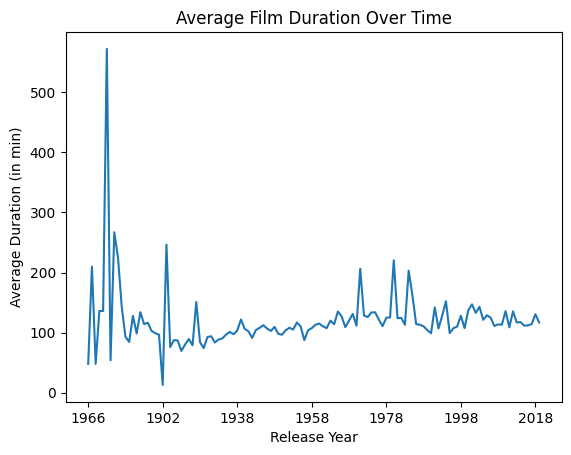

In [21]:
avg_duration_by_year = df.groupby('ReleaseYear')['Duration'].mean()
avg_duration_by_year.plot()
plt.title('Average Film Duration Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (in min)')
plt.show()

* Filmmaker tend to have make the film with shorter duration, almost between 100-200 mins

Which genres are most prevalent among the top 1000 films? 

In [22]:
# Cooncatenate 3 genres columns
all_genre= pd.concat([df['Genre_1'], df['Genre_2'], df['Genre_3']])
all_genre       # variation in genres label

0           Crime
1           Drama
2          Action
3           Crime
4           Drama
          ...    
995          None
996          None
997          None
998     Film-Noir
999     Film-Noir
Length: 3000, dtype: object

In [23]:
all_genres= all_genre.str.strip()
genres_count= all_genres.value_counts()
genres_count

Drama          758
Comedy         234
Romance        191
Crime          161
Adventure      108
Thriller        91
Action          75
War             74
Mystery         74
History         69
Biography       67
Documentary     67
Animation       43
Music           40
Sci-Fi          39
Film-Noir       37
Fantasy         36
Horror          33
Western         30
Family          29
Musical         18
Sport           13
Short            8
dtype: int64

Text(0.5, 1.0, 'The most common genres among the top 1000 films')

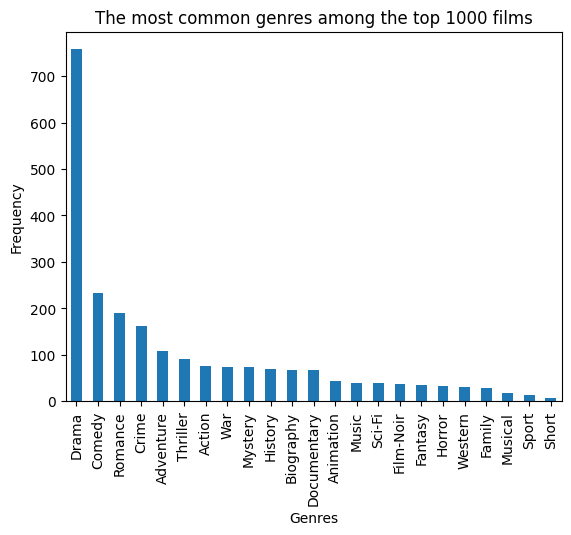

In [24]:
genres_count.plot.bar()
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('The most common genres among the top 1000 films')


=> Drama is the most common genres among the top 1000 films

In [36]:

genre_series= genre= pd.concat([df['Genre_1'], df['Genre_2'], df['Genre_3']], ignore_index= True)
genre_series.dropna(inplace=True)
genre_text = ''.join(genre_series)
genre_text

'CrimeDramaActionCrimeDramaDramaAdventureCrimeDramaDocumentaryDramaDramaDramaCrimeComedyDramaComedyBiographyCrimeBiographyDramaComedyHorrorDramaCrimeFilm-NoirAnimationComedyDramaMysteryCrimeDramaDocumentaryBiographyComedyDramaDramaDramaDramaAdventureActionAdventureCrimeDramaDramaDramaDramaDramaActionDramaDramaDramaDramaComedyDramaActionBiographyComedyBiographyAdventureDramaAnimationComedyMysteryDramaCrimeDramaCrimeHorrorAdventureDramaComedyDocumentaryDocumentaryDramaShortAnimationDramaDramaCrimeCrimeDramaDramaDocumentaryDramaDramaActionAdventureDocumentaryDramaComedyComedyDramaDramaComedyDramaDocumentaryActionDramaDramaActionDocumentaryDocumentaryCrimeDramaActionDramaDramaDramaDramaDocumentaryDramaAnimationDramaDramaDramaDramaComedyDramaCrimeDramaDramaAnimationDramaAdventureAnimationDramaDramaDramaDramaComedyActionDocumentaryCrimeDramaDramaDramaDramaDramaComedyDramaComedyCrimeAdventureDramaDramaShortActionDramaWesternAdventureDramaDramaDramaComedyBiographyDramaDramaDramaDramaCrimeDrama

<Figure size 1000x600 with 0 Axes>

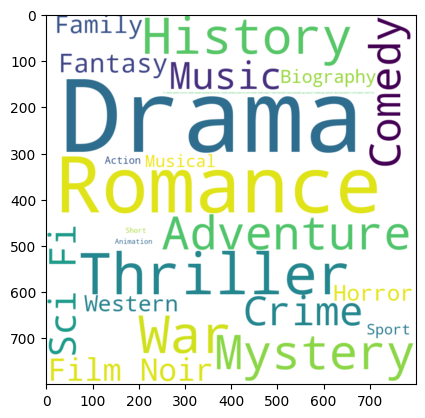

<Figure size 1000x600 with 0 Axes>

In [47]:
genre_worldcloud = WordCloud(width= 800, height= 800,background_color= 'white').generate(genre_text)
plt.imshow(genre_worldcloud, interpolation= 'bilinear')
plt.figure(figsize= (10,6))


Number of movies and average revenue per release year

In [61]:
movie_per_year = df.groupby('ReleaseYear').agg({'MovieTitle':'count'})
movie_per_year = movie_per_year.rename(columns={'MovieTitle': 'Number_of_Movies'})
movie_per_year

,Number_of_Movies
ReleaseYear,
1966,1
1974,1
1977,1
1984,1
1988,1
...,...
2015,17
2016,20
2017,24


Text(0.5, 1.0, 'Number of Movies per year')

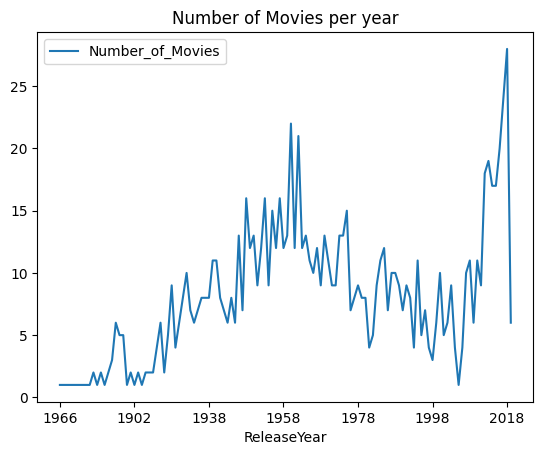

In [63]:
movie_per_year.plot(kind= 'line')
plt.title('Number of Movies per year')

What is the distribution of ratings among the top 1000 films? Are there any patterns or trends in film ratings?

Text(0, 0.5, 'Frequency')

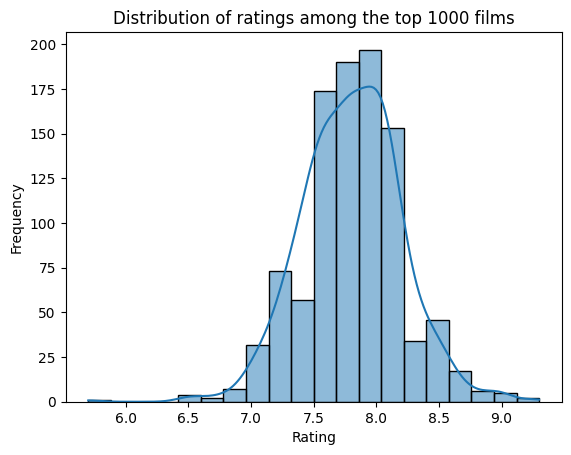

In [ ]:
sns.histplot(data=df, x='Rating', bins=20, kde = 'True')
plt.title('Distribution of ratings among the top 1000 films')
plt.xlabel('Rating')
plt.ylabel('Frequency')

=> Few movies are terrible, most of the movie are average, few movies are outstanding.
Cluster in the avarage rating area (very likely)

* Relationship between the release year, duration, rating, and gross revenue of the films

<Axes: >

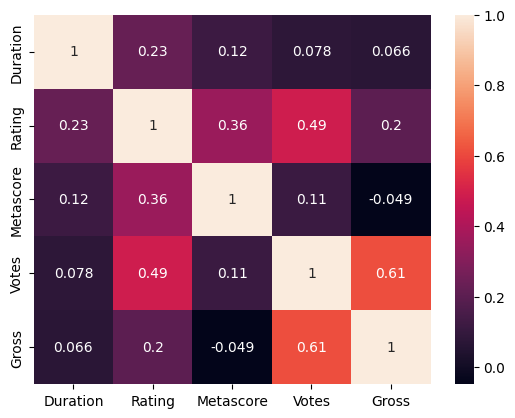

In [49]:
correlationMatrix= df.corr()
sns.heatmap(correlationMatrix, annot= True)

=> Note: all positive except metascore have negative/inverse relationship with gross.
There will be significant relationship between Votes and Rating, Votes and Gross, Rating and Metascore
=> It really makes sense

I assume that Newer films tend to have higher metascore and gross if they have higher votes and ratings. 


Are there any significant correlations between the duration of a film and its ratings or gross revenue?

* Duration and Rating have slightly positive correlation
* Duration and Gross have slightly positive correlation
* Rating and Gross experienced the same result

How do the ratings of the top 100 films compare across different genres? Are certain genres consistently rated higher?

In [ ]:
# Create new DataFrame: 
genre_df= df['Genre'].str.split(',', expand= True)
genre_df['MovieTitle'] = df['MovieTitle']   # add MovieTitlte and Rating to new DataFrame
genre_df['Rating']= df['Rating']

In [ ]:
# Reshape the DataFrame to have each genre in a separate row
genres_df = genre_df.melt(id_vars=['MovieTitle', 'Rating'], value_name='Genre').dropna()   # identifier variables
genre_df

,0,1,2,MovieTitle,Rating
0,Crime,Drama,None,Bố Già,9.2
1,Drama,None,None,Câu Chuyện Tokyo,8.1
2,Action,Drama,None,Bảy Võ Sĩ Đạo,8.6
3,Crime,Drama,None,Bố Già Phần II,9.0
4,Drama,Romance,War,Chuyện Tình Thế Chiến,8.5
...,...,...,...,...,...
995,Drama,None,None,L'eau froide,7.0
996,Drama,None,None,We the Animals,6.9
997,Comedy,Drama,None,David Holzman's Diary,6.5
998,Crime,Drama,Film-Noir,Moonrise,7.0


In [ ]:
genres_df['Genre'] = genres_df['Genre'].str.strip()

In [ ]:
average_ratings = genres_df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
average_ratings

Genre
War            7.998649
Short          7.975000
Animation      7.965116
Action         7.940000
Sci-Fi         7.928205
Adventure      7.916667
Documentary    7.889552
Music          7.882500
Thriller       7.882418
Family         7.865517
Biography      7.841791
Mystery        7.831081
Fantasy        7.827778
Sport          7.815385
History        7.810145
Crime          7.799379
Drama          7.796174
Romance        7.777487
Western        7.773333
Film-Noir      7.754054
Horror         7.696970
Comedy         7.686752
Musical        7.633333
Name: Rating, dtype: float64

War is movie type having the highest average ratings